# Import modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, cv2, glob, time, zipfile
import numpy as np

import matplotlib.pyplot as plt

# Set Constants

In [ ]:
# Constants
WIDTH, HEIGHT = 128, 128

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring(Vessel_Method)',
    'number' : '3',
    'date' : '02-22-2022',
    'description' : 'Save Low dimensional data\n'
    }

ROOT_DIR = os.path.join('/content')

IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

plt.gray()

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')

ROOT_DIR:        /content
IMAGE_DIR:       /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results


<Figure size 432x288 with 0 Axes>

In [ ]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

# Load and Preprocessing Data

In [ ]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [ ]:
train_images = []
for file in file_names:
    src = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    train_images.append(dst)

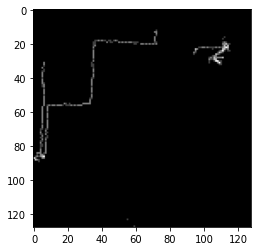

(128, 128)


In [ ]:
plt.imshow(train_images[0])
plt.show()
print(train_images[0].shape)

In [ ]:
X_train = np.array( train_images ).astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( -1, HEIGHT, WIDTH, 1 ) )

In [ ]:
print( X_train.shape )

(18670, 128, 128, 1)


# Test Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
os.chdir(DATA_DIR)

encoder = keras.models.load_model('encoder(vessel).h5')
encoder.summary()

os.chdir(CURR_RESULT_DIR)

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624

In [ ]:
low_dimension_data, prevIdx = [ ], 0
for i in range(0, len(X_train), 1000):
    low_dimension_data.extend(encoder(X_train[prevIdx:i]))
    prevIdx = i
low_dimension_data.extend(encoder(X_train[prevIdx:]))

low_dimension_data = np.array(low_dimension_data)
print(X_train.shape)
print(low_dimension_data.shape)

(18670, 128, 128, 1)
(18670, 1024)


In [ ]:
groups = ['Geolife_trajectory218.png',  'Geolife_trajectory357.png', 'Geolife_trajectory507.png', 'Geolife_trajectory1434.png', 'Geolife_trajectory1875.png', 'Geolife_trajectory3676.png']

0.0 Geolife_trajectory218.png
0.03385430574417114 Geolife_trajectory189.png
0.034291744232177734 Geolife_trajectory220.png
0.04043692350387573 Geolife_trajectory231.png
0.04948920011520386 Geolife_trajectory242.png
0.05217939615249634 Geolife_trajectory188.png
0.05490368604660034 Geolife_trajectory225.png
0.06632161140441895 Geolife_trajectory223.png
0.09021222591400146 Geolife_trajectory195.png
0.1405509114265442 Geolife_trajectory217.png


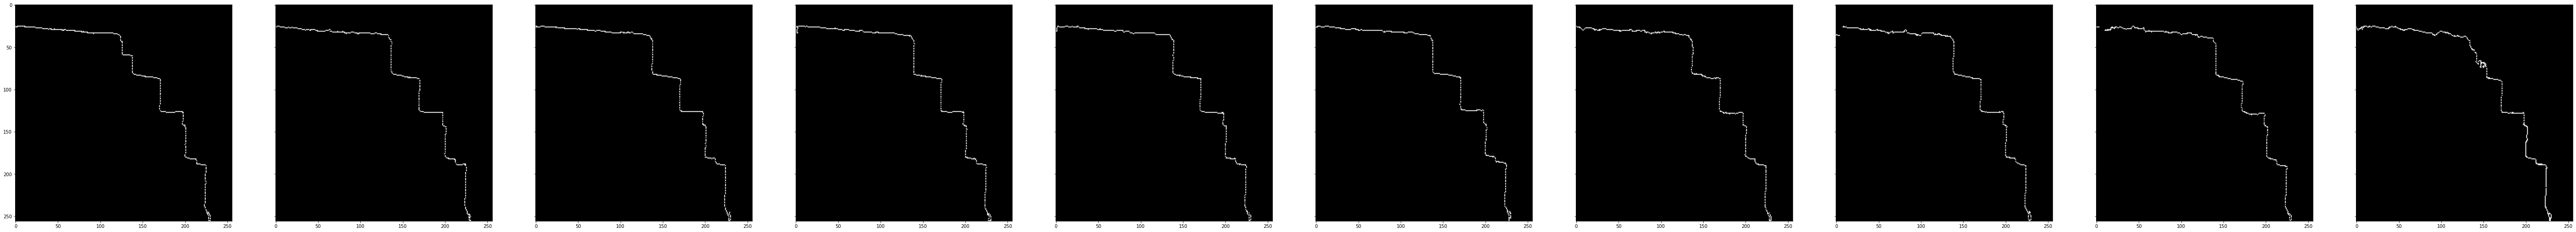

0.0 Geolife_trajectory357.png
0.04804617166519165 Geolife_trajectory382.png
0.057335078716278076 Geolife_trajectory395.png
0.05804699659347534 Geolife_trajectory394.png
0.06587040424346924 Geolife_trajectory392.png
0.06871408224105835 Geolife_trajectory344.png
0.07159191370010376 Geolife_trajectory361.png
0.07776796817779541 Geolife_trajectory388.png
0.10928577184677124 Geolife_trajectory363.png
0.11008119583129883 Geolife_trajectory390.png


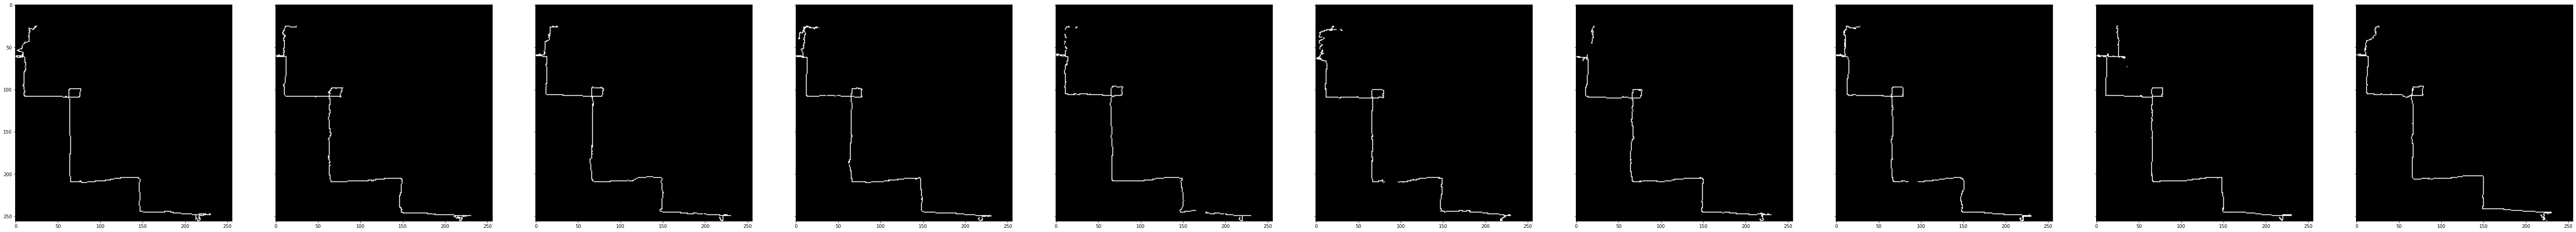

0.0 Geolife_trajectory507.png
0.28425025939941406 Geolife_trajectory11173.png
0.28425025939941406 Geolife_trajectory18262.png
0.3270488977432251 Geolife_trajectory2599.png
0.33942627906799316 Geolife_trajectory1411.png
0.34952080249786377 Geolife_trajectory2487.png
0.358730673789978 Geolife_trajectory11168.png
0.358730673789978 Geolife_trajectory18257.png
0.3619755506515503 Geolife_trajectory1193.png
0.36373788118362427 Geolife_trajectory9046.png


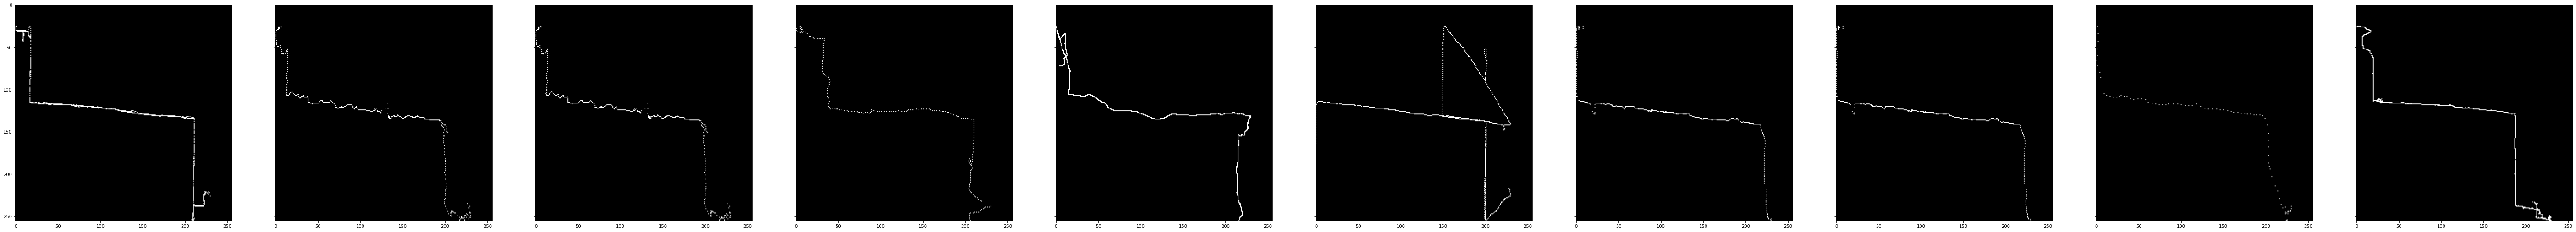

0.0 Geolife_trajectory1434.png
0.08225029706954956 Geolife_trajectory6487.png
0.08883213996887207 Geolife_trajectory1428.png
0.22614961862564087 Geolife_trajectory1544.png
0.2731425166130066 Geolife_trajectory3258.png
0.2862735986709595 Geolife_trajectory3286.png
0.29010242223739624 Geolife_trajectory10388.png
0.2903139591217041 Geolife_trajectory1515.png
0.2980833649635315 Geolife_trajectory1456.png
0.2992159128189087 Geolife_trajectory1459.png


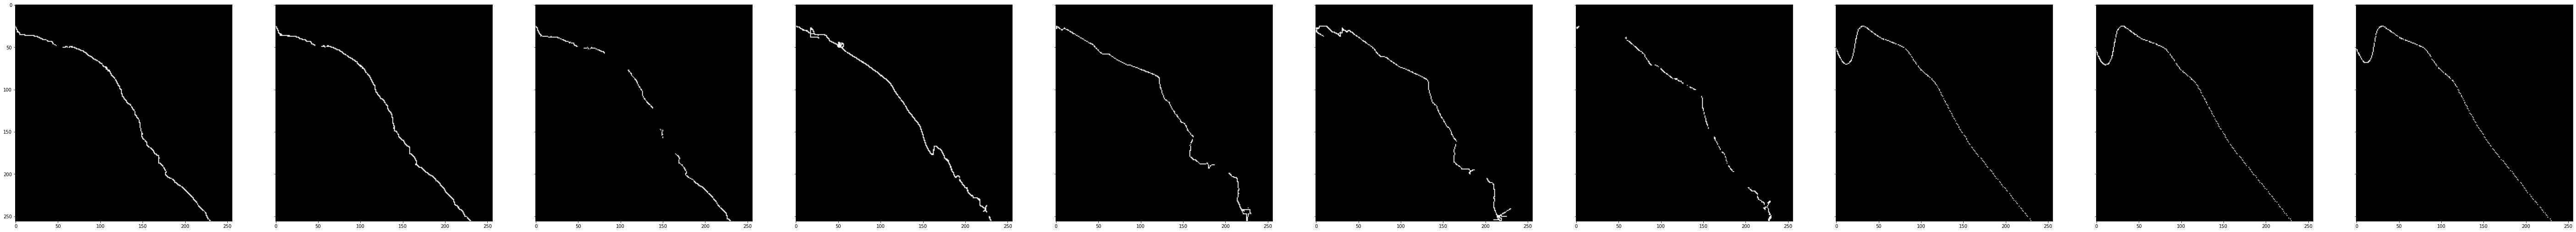

0.0 Geolife_trajectory1875.png
0.051529765129089355 Geolife_trajectory1913.png
0.07227611541748047 Geolife_trajectory1845.png
0.08147329092025757 Geolife_trajectory1883.png
0.1717625856399536 Geolife_trajectory1957.png
0.26852482557296753 Geolife_trajectory1930.png
0.29475557804107666 Geolife_trajectory1907.png
0.2957978844642639 Geolife_trajectory1894.png
0.32546812295913696 Geolife_trajectory9034.png
0.38137662410736084 Geolife_trajectory1847.png


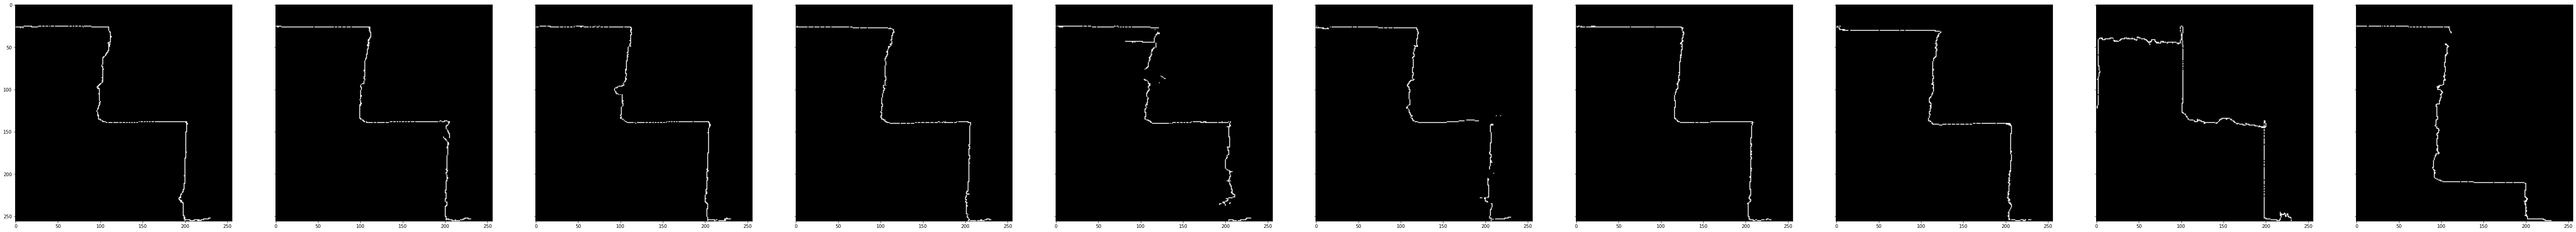

0.0 Geolife_trajectory3676.png
0.039753079414367676 Geolife_trajectory3881.png
0.054076433181762695 Geolife_trajectory3686.png
0.06828391551971436 Geolife_trajectory3720.png
0.07306116819381714 Geolife_trajectory3818.png
0.07513129711151123 Geolife_trajectory3838.png
0.11350876092910767 Geolife_trajectory3669.png
0.13228338956832886 Geolife_trajectory3856.png
0.13546663522720337 Geolife_trajectory3706.png
0.16085851192474365 Geolife_trajectory3790.png


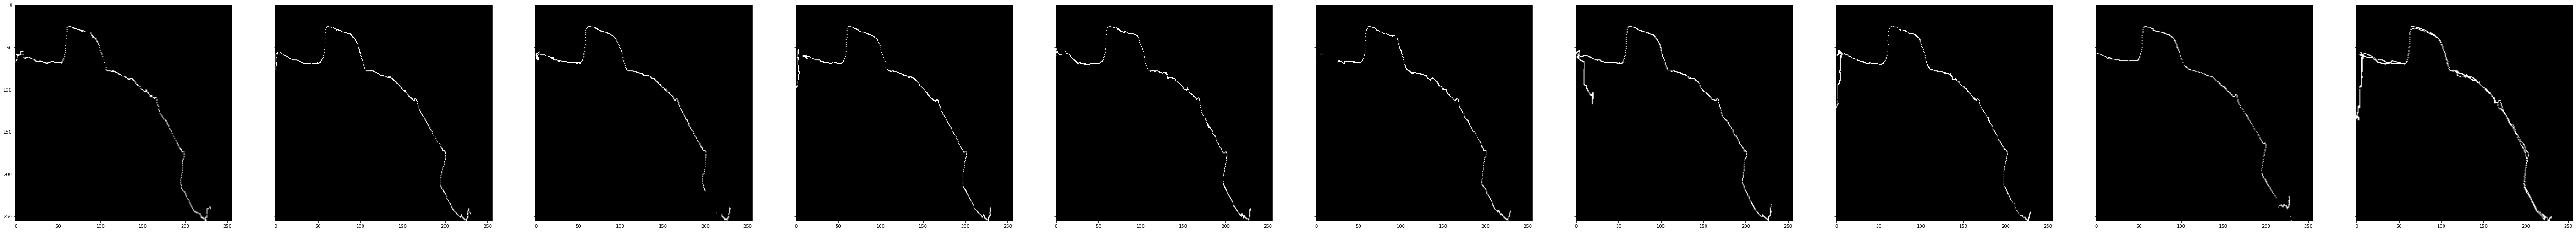

In [30]:
from scipy.spatial import distance

os.chdir(CURR_RESULT_DIR)

similarities = []
for sim_idx, target_name in enumerate(groups):
    target_idx = file_names.index(target_name)

    similarities.append([])
    for i, low in enumerate(low_dimension_data):
        similarities[sim_idx].append((distance.cosine(low_dimension_data[target_idx], low), file_names[i]))

    similarities[sim_idx].sort(key = lambda x: x[0])
    for i in range(10):
        print(similarities[sim_idx][i][0], similarities[sim_idx][i][1])
    
    os.chdir(IMAGE_DIR)
    fig, ax = plt.subplots(1, 10, sharex = True, sharey = True, figsize = (100, 10))
    for i in range(10):
        images = cv2.imread(similarities[sim_idx][i][1], cv2.IMREAD_GRAYSCALE)
        ax[i].imshow(images)

    os.chdir(CURR_RESULT_DIR)
    plt.savefig(f'Similar_trajectories_with({sim_idx}).png', dpi = 300)
    plt.show()

In [41]:
import pandas as pd

os.chdir(CURR_RESULT_DIR)
for similarity in similarities:
    df = pd.DataFrame(similarity, columns = ['Cosine Similarity', 'File Name'])
    print(df.head())

    file_number = similarity[0][1].split('_')[1].split('.')[0][len('trajectory'):]
    df.to_csv(f'Error_of_{file_number}.csv')

   Cosine Similarity                  File Name
0           0.000000  Geolife_trajectory218.png
1           0.033854  Geolife_trajectory189.png
2           0.034292  Geolife_trajectory220.png
3           0.040437  Geolife_trajectory231.png
4           0.049489  Geolife_trajectory242.png
   Cosine Similarity                  File Name
0           0.000000  Geolife_trajectory357.png
1           0.048046  Geolife_trajectory382.png
2           0.057335  Geolife_trajectory395.png
3           0.058047  Geolife_trajectory394.png
4           0.065870  Geolife_trajectory392.png
   Cosine Similarity                    File Name
0           0.000000    Geolife_trajectory507.png
1           0.284250  Geolife_trajectory11173.png
2           0.284250  Geolife_trajectory18262.png
3           0.327049   Geolife_trajectory2599.png
4           0.339426   Geolife_trajectory1411.png
   Cosine Similarity                   File Name
0           0.000000  Geolife_trajectory1434.png
1           0.082250  Geol